In [1]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

C:\Users\gchen\AppData\Roaming\Python\Python36\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
def create_court(ax, color):
    
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax

# shot chart

In [12]:
# Define the player you want to analyze
player_name = 'LeBron James'
# player_name = 'Stephen Curry'
# player_name = 'Nikola Jokic'
# player_name = 'Kevin Durant'

# Define the season you want to analyze
season = '2022-23'

# Get the player ID for the given player
player_info = pd.DataFrame(players.get_players())
player = player_info[player_info['full_name']==player_name]
player_id = player['id'].values
player_id

array([2544], dtype=int64)

In [15]:
# Get the shot chart data for the player's most recent game
shotchart = shotchartdetail.ShotChartDetail(
            team_id=0,
            player_id=player_id,
            last_n_games = 4,
            season_type_all_star = 'Playoffs',
            context_measure_simple='FGA')

# Create a pandas DataFrame from the shot chart data
shot_data = shotchart.get_data_frames()[0]
shot_data

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0   Shot Chart Detail  0042200311              9       2544  LeBron James   
1   Shot Chart Detail  0042200311             21       2544  LeBron James   
2   Shot Chart Detail  0042200311             30       2544  LeBron James   
3   Shot Chart Detail  0042200311             55       2544  LeBron James   
4   Shot Chart Detail  0042200311            137       2544  LeBron James   
..                ...         ...            ...        ...           ...   
74  Shot Chart Detail  0042200314            529       2544  LeBron James   
75  Shot Chart Detail  0042200314            550       2544  LeBron James   
76  Shot Chart Detail  0042200314            571       2544  LeBron James   
77  Shot Chart Detail  0042200314            598       2544  LeBron James   
78  Shot Chart Detail  0042200314            603       2544  LeBron James   

       TEAM_ID           TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0   1610612747  Los Angeles Lakers       1                 11   
1   1610612747  Los Angeles Lakers       1                 10   
2   1610612747  Los Angeles Lakers       1                  9   
3   1610612747  Los Angeles Lakers       1                  7   
4   1610612747  Los Angeles Lakers       1                  2   
..         ...                 ...     ...                ...   
74  1610612747  Los Angeles Lakers       4                  6   
75  1610612747  Los Angeles Lakers       4                  5   
76  1610612747  Los Angeles Lakers       4                  3   
77  1610612747  Los Angeles Lakers       4                  0   
78  1610612747  Los Angeles Lakers       4                  0   

    SECONDS_REMAINING  ...        SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
0                  36  ...             Center(C)  Less Than 8 ft.   
1                   2  ...         Right Side(R)         8-16 ft.   
2                  10  ...  Left Side Center(LC)          24+ ft.   
3                  19  ...             Center(C)  Less Than 8 ft.   
4                  13  ...             Center(C)  Less Than 8 ft.   
..                ...  ...                   ...              ...   
74                 49  ...             Center(C)  Less Than 8 ft.   
75                  3  ...             Center(C)  Less Than 8 ft.   
76                 20  ...             Center(C)  Less Than 8 ft.   
77                 26  ...          Left Side(L)        16-24 ft.   
78                  1  ...             Center(C)  Less Than 8 ft.   

   SHOT_DISTANCE LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  GAME_DATE  \
0              1   -17     3                   1               1   20230516   
1             10    91    58                   1               0   20230516   
2             25   -88   241                   1               0   20230516   
3              1    -9    14                   1               0   20230516   
4              3    39     4                   1               1   20230516   
..           ...   ...   ...                 ...             ...        ...   
74             7    34    68                   1               0   20230522   
75             6   -18    59                   1               0   20230522   
76             3    15    27                   1               1   20230522   
77            19  -194    27                   1               0   20230522   
78             4   -47     8                   1               0   20230522   

    HTM  VTM  
0   DEN  LAL  
1   DEN  LAL  
2   DEN  LAL  
3   DEN  LAL  
4   DEN  LAL  
..  ...  ...  
74  LAL  DEN  
75  LAL  DEN  
76  LAL  DEN  
77  LAL  DEN  
78  LAL  DEN  

[79 rows x 24 columns]

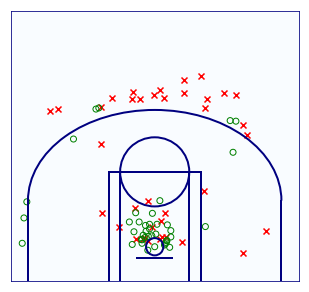

In [16]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
line_color = 'navy'
ax = create_court(ax, line_color)
ax.spines['top'].set_color(line_color)
ax.spines['bottom'].set_color(line_color)
ax.spines['left'].set_color(line_color)
ax.spines['right'].set_color(line_color)
ax.set_facecolor((0.8, 0.9, 1, 0.1))

# Plot scatter plot of shots
for i, d in shot_data.groupby('SHOT_MADE_FLAG'):
    ax.scatter(-d['LOC_X'], d['LOC_Y'] + 60, edgecolors=['red', 'green'][i], facecolors=['red', 'none'][i], marker=['x', 'o'][i])

# players comparison

In [4]:
player_name = 'Jimmy Butler'
# player_name = 'Nikola Jokic'


# Define the season you want to analyze
season = '2022-23'

# Get the player ID for the given player
player_info = pd.DataFrame(players.get_players())
player = player_info[player_info['full_name']==player_name]
player_id = player['id'].values
player_id

array([202710], dtype=int64)

In [5]:
player_id1 = 202710 # butler
player_id2 = 203999 # jokic
game_id = '0042200403' # 6-7
last_n_games = 1

In [6]:
# Get the shot chart data for the player's most recent game
shotchart = shotchartdetail.ShotChartDetail(
            team_id=0,
            player_id=player_id1,
            #last_n_games = last_n_games,
            game_id_nullable = game_id,
            season_type_all_star = 'Playoffs',
            context_measure_simple='FGA')

# Create a pandas DataFrame from the shot chart data
shot_data1 = shotchart.get_data_frames()[0]
shot_data1.head()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0  Shot Chart Detail  0042200403             29     202710  Jimmy Butler   
1  Shot Chart Detail  0042200403             31     202710  Jimmy Butler   
2  Shot Chart Detail  0042200403             56     202710  Jimmy Butler   
3  Shot Chart Detail  0042200403            102     202710  Jimmy Butler   
4  Shot Chart Detail  0042200403            119     202710  Jimmy Butler   

      TEAM_ID   TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  ...  \
0  1610612748  Miami Heat       1                  9                 24  ...   
1  1610612748  Miami Heat       1                  8                 53  ...   
2  1610612748  Miami Heat       1                  6                 27  ...   
3  1610612748  Miami Heat       1                  3                 14  ...   
4  1610612748  Miami Heat       1                  2                 20  ...   

          SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y  \
0              Center(C)  Less Than 8 ft.             2    29     5   
1              Center(C)  Less Than 8 ft.             4   -33    30   
2              Center(C)  Less Than 8 ft.             2    21     5   
3  Right Side Center(RC)          24+ ft.            26   196   171   
4              Center(C)  Less Than 8 ft.             4    43     8   

  SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  GAME_DATE  HTM  VTM  
0                   1               1   20230607  MIA  DEN  
1                   1               0   20230607  MIA  DEN  
2                   1               0   20230607  MIA  DEN  
3                   1               0   20230607  MIA  DEN  
4                   1               1   20230607  MIA  DEN  

[5 rows x 24 columns]

In [7]:
# Get the shot chart data for the player's most recent game
shotchart = shotchartdetail.ShotChartDetail(
            team_id=0,
            player_id=player_id2,
            # last_n_games = last_n_games,
            game_id_nullable = game_id,
            season_type_all_star = 'Playoffs',
            context_measure_simple='FGA')

# Create a pandas DataFrame from the shot chart data
shot_data2 = shotchart.get_data_frames()[0]
shot_data2.head()

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0  Shot Chart Detail  0042200403             15     203999  Nikola Jokic   
1  Shot Chart Detail  0042200403             30     203999  Nikola Jokic   
2  Shot Chart Detail  0042200403             67     203999  Nikola Jokic   
3  Shot Chart Detail  0042200403             71     203999  Nikola Jokic   
4  Shot Chart Detail  0042200403             77     203999  Nikola Jokic   

      TEAM_ID       TEAM_NAME  PERIOD  MINUTES_REMAINING  SECONDS_REMAINING  \
0  1610612743  Denver Nuggets       1                 11                  0   
1  1610612743  Denver Nuggets       1                  9                  7   
2  1610612743  Denver Nuggets       1                  5                 57   
3  1610612743  Denver Nuggets       1                  5                 32   
4  1610612743  Denver Nuggets       1                  5                  8   

   ... SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y  \
0  ...   Left Side(L)         8-16 ft.            11   -94    71   
1  ...      Center(C)  Less Than 8 ft.             4     0    43   
2  ...      Center(C)          24+ ft.            26    47   265   
3  ...      Center(C)        16-24 ft.            17    15   174   
4  ...      Center(C)  Less Than 8 ft.             6     2    63   

  SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  GAME_DATE  HTM  VTM  
0                   1               0   20230607  MIA  DEN  
1                   1               1   20230607  MIA  DEN  
2                   1               0   20230607  MIA  DEN  
3                   1               1   20230607  MIA  DEN  
4                   1               1   20230607  MIA  DEN  

[5 rows x 24 columns]

C:\Users\gchen\AppData\Roaming\Python\Python36\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


Text(0.5,0.98,'202710 vs 203999 (Last 1 Games)')

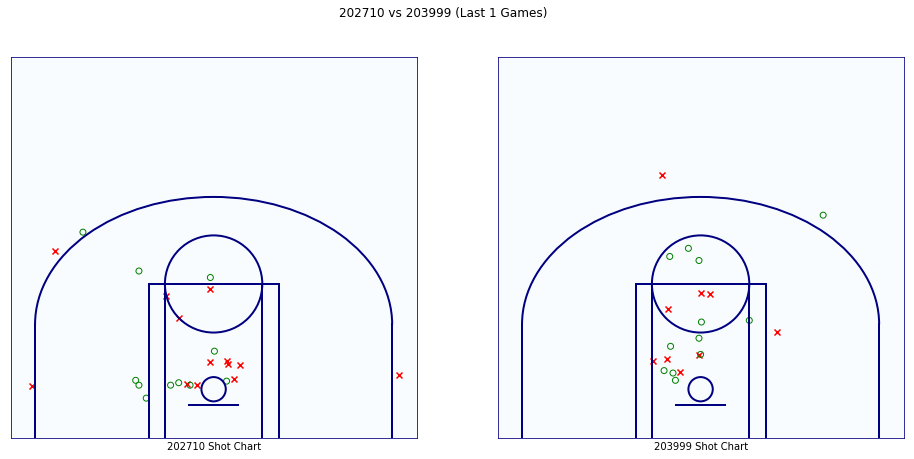

In [8]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Draw court
line_color = 'navy'
ax1 = create_court(ax1, line_color)
ax1.spines['top'].set_color(line_color)
ax1.spines['bottom'].set_color(line_color)
ax1.spines['left'].set_color(line_color)
ax1.spines['right'].set_color(line_color)
ax1.set_facecolor((0.8, 0.9, 1, 0.1))
ax1.set_xlabel(f"{player_id1} Shot Chart")

# Plot scatter plot of shots
for i, d in shot_data1.groupby('SHOT_MADE_FLAG'):
    ax1.scatter(-d['LOC_X'], d['LOC_Y'] + 60, edgecolors=['red', 'green'][i], facecolors=['red', 'none'][i], marker=['x', 'o'][i])

ax2 = create_court(ax2, line_color)
ax2.spines['top'].set_color(line_color)
ax2.spines['bottom'].set_color(line_color)
ax2.spines['left'].set_color(line_color)
ax2.spines['right'].set_color(line_color)
ax2.set_facecolor((0.8, 0.9, 1, 0.1))
ax2.set_xlabel(f"{player_id2} Shot Chart")

# Plot scatter plot of shots
for i, d in shot_data2.groupby('SHOT_MADE_FLAG'):
    ax2.scatter(-d['LOC_X'], d['LOC_Y'] + 60, edgecolors=['red', 'green'][i], facecolors=['red', 'none'][i], marker=['x', 'o'][i])

plt.suptitle(f"{player_id1} vs {player_id2} (Last {last_n_games} Games)")